<a href="https://colab.research.google.com/github/Shubhranshu-Malhotra/Tensorflow-Developer-ZTM/blob/main/%5BPractice%5D_08_introduction_to_nlp_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing Basics in TensorFlow


## Get helper functions


In [1]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-06-02 10:17:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-06-02 10:17:33 (73.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
# Import helper functions
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

## Download a text dataset

We'll be using the [Real or Not?](https://www.kaggle.com/c/nlp-getting-started/data) datset from Kaggle which contains text-based Tweets about natural disasters. 


In [3]:
# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2021-06-02 10:17:39--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 173.194.79.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2021-06-02 10:17:39 (95.5 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



`nlp_getting_started.zip` contains the following 3 `.csv` files:
* `sample_submission.csv` - an example of the file you'd submit to the Kaggle competition of your model's predictions.
* `train.csv` - training samples of real and not real diaster Tweets.
* `test.csv` - testing samples of real and not real diaster Tweets.

## Visualize text dataset

In [4]:
# Read the data
import pandas as pd
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [5]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
train_df['text'][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [7]:
train_df_shuffled = train_df.sample(frac = 1, random_state = 42)

In [8]:
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [9]:
# Visualize the test data
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [10]:
# How many examples of each class
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [11]:
# Total samples
len(train_df), len(test_df)

(7613, 3263)

In [12]:
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [13]:
# Visualize some random training sample
import random
for i in range(10):
  random_index = random.choice(range(0,len(train_df_shuffled)))
  target = train_df.iloc[random_index].target
  text = train_df.iloc[random_index].text
  print(f"Index: {random_index}")
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Index: 2971
Target: 0 (not real disaster)
Text:
don't you dare play the victim when I've been drowning for years.

---

Index: 3159
Target: 0 (not real disaster)
Text:
From @LeanDOTorg: Lean Thinking for Quicker Police Emergency Response Time http://t.co/suZBkyW5TT

---

Index: 1565
Target: 1 (real disaster)
Text:
2Leezy its like you're about to fall down a cliff but you're grabbing my hand but my palms are sweaty ... Why bruh? https://t.co/GrWdr4kuf3

---

Index: 6926
Target: 0 (not real disaster)
Text:
ÛÏ@YMcglaun: @JulieKragt @WildWestSixGun You're a lot safer that way.Ûyeah a lot more stable &amp; if I get in trouble I have a seat right there

---

Index: 6510
Target: 0 (not real disaster)
Text:
3 Things All Affiliate Marketers Need To Survive Online - Every affiliate marketer is always... http://t.co/kPMYqUJSUE

---

Index: 6966
Target: 1 (real disaster)
Text:
@author_mike Amen today is the Day of Salvation. THX brother Mike for your great encouragement. - http://t.co/cybKsXHF7

In [14]:
len(train_df_shuffled)

7613

### Split data into training and validation sets

Since the test set has no labels and we need a way to evalaute our trained models, we'll split off some of the training data and create a validation set.


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_val, y_train, y_val = train_test_split(train_df_shuffled['text'].to_numpy(),
                                                  train_df_shuffled['target'].to_numpy(),
                                                  test_size = 0.1,
                                                  random_state = 42)

In [17]:
len(X_train), len(y_train), len(X_val), len(y_val)

(6851, 6851, 762, 762)

In [18]:
len(train_df_shuffled)

7613

In [19]:
len(X_train) + len(X_val)

7613

In [20]:
# Check the first 10 samples
X_train[:10], y_train[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

In [21]:
X_val[:10], y_val[:10]

(array(['DFR EP016 Monthly Meltdown - On Dnbheaven 2015.08.06 http://t.co/EjKRf8N8A8 #Drum and Bass #heavy #nasty http://t.co/SPHWE6wFI5',
        'FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/qZQc8WWwcN via @usatoday',
        'Gunmen kill four in El Salvador bus attack: Suspected Salvadoran gang members killed four people and wounded s... http://t.co/CNtwB6ScZj',
        '@camilacabello97 Internally and externally screaming',
        'Radiation emergency #preparedness starts with knowing to: get inside stay inside and stay tuned http://t.co/RFFPqBAz2F via @CDCgov',
        'Investigators rule catastrophic structural failure resulted in 2014 Virg.. Related Articles: http://t.co/Cy1LFeNyV8',
        'How the West was burned: Thousands of wildfires ablaze in #California alone http://t.co/iCSjGZ9tE1 #climate #energy http://t.co/9FxmN0l0Bd',
        "Map: Typhoon Soudelor's predicted path as it approaches Taiwan; expected to make landfall over so

## Converting text into numbers


### Method 1: Text Vecorization (Tokenization) 

In [22]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Use the default TextVectorization parameters [FOR LEARNING PURPOSE]
# Automaticalls adds <OOV> token for unknown words
test_vectorizer = TextVectorization(max_tokens=None, # num of words in vocabulary
                                    standardize = "lower_and_strip_punctuation",
                                    split = 'whitespace',
                                    ngrams = None,
                                    output_mode = 'int',
                                    output_sequence_length = None,
                                    pad_to_max_tokens = True
                                    )


In [23]:
len(X_train[0].split())

7

In [24]:
# Find the average number of tokes (word) in the training tweets
AVERAGE_LEN = round(sum([len(i.split()) for i in X_train])/len(X_train))
AVERAGE_LEN

15

In [25]:
# Set up text vectoriation variables
MAX_VOCAB_LEN = 10000
MAX_LEN = AVERAGE_LEN

In [26]:
text_vectorizer = TextVectorization(max_tokens= MAX_VOCAB_LEN,
                                    output_mode = 'int',
                                    output_sequence_length = MAX_LEN)

In [27]:
# Fit the text vectorizer to the training set
text_vectorizer.adapt(X_train)

In [28]:
type(X_train)

numpy.ndarray

In [29]:
# Create a sample sentence and tokenize it
sample_sentences = ['We had a 6.5 earthquake yesterday.', 'We will go for a picnic tomorrow.']
text_vectorizer(sample_sentences)

<tf.Tensor: shape=(2, 15), dtype=int64, numpy=
array([[  46,   94,    3,    1,  290, 1730,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [  46,   38,  112,   10,    3,    1,  665,    0,    0,    0,    0,
           0,    0,    0,    0]])>

1 represents the \<OOV> token

In [30]:
# Choose a random sentence from training dataset and tokenize it
random_sentence = random.choice(X_train)
print(f'Original text:\n {random_sentence},\
      \n \n Vectorized version:\n {text_vectorizer([random_sentence])}')

Original text:
 Chiasson Sens can't come to deal #ColoradoAvalanche #Avalanche http://t.co/2bk7laGMa9 http://t.co/bkDGCfsuiQ,      
 
 Vectorized version:
 [[   1 8662   98  220    5  711    1  611    1    1    0    0    0    0
     0]]


In [31]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # get the most common words
bottom_5_words = words_in_vocab[-5:] # get the least common words
print(f"Number of words in the vocab: {len(words_in_vocab)}")
print(f"5 most common words in vocab: {top_5_words}")
print(f"5 least common words in vocab: {bottom_5_words}")

Number of words in the vocab: 10000
5 most common words in vocab: ['', '[UNK]', 'the', 'a', 'in']
5 least common words in vocab: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Creating an Embedding using an Embedding Layer

The main parameters we're concerned about here are:
* `input_dim` - The size of the vocabulary (e.g. `len(text_vectorizer.get_vocabulary()`).
* `output_dim` - The size of the output embedding vector, for example, a value of `100` outputs a  feature vector of size 100 for each word.
* `embeddings_initializer` - How to initialize the embeddings matrix, default is `"uniform"` which randomly initalizes embedding matrix with uniform distribution. This can be changed for using pre-learned embeddings.
* `input_length` - Length of sequences being passed to embedding layer.


In [32]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = MAX_VOCAB_LEN,
                             output_dim = 128,
                             input_length = MAX_LEN)
embedding

In [33]:
# Get a random sentence from training set and pass through embedding layer
random_sentence = random.choice(X_train)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence])) 
# Right now the representation is random but Will be trained during training to represent sentences better
sample_embed

Original text:
http://t.co/c1H7JECFrV @RoyalCarribean do your passengers know about the mass murder that takes place in the #FaroeIslands every year?      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.02281413,  0.00017018, -0.01963602, ..., -0.01486707,
         -0.00902685,  0.0298188 ],
        [-0.02738748, -0.0006512 ,  0.04516149, ..., -0.00971802,
         -0.02999198, -0.03921006],
        [ 0.03311646,  0.03873673, -0.0375039 , ..., -0.00912901,
          0.00703017, -0.03664236],
        ...,
        [-0.0157882 ,  0.01797621, -0.02906491, ...,  0.03485911,
         -0.0068171 ,  0.0482182 ],
        [ 0.0191839 ,  0.04922228,  0.00471199, ...,  0.03824576,
         -0.04415964,  0.01120831],
        [-0.03500504, -0.04768183, -0.03637545, ...,  0.0269448 ,
          0.04886721,  0.00171173]]], dtype=float32)>

In [34]:
# Check out a single token's embedding
sample_embed[0][0], sample_embed[0][0].shape, random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-0.02281413,  0.00017018, -0.01963602,  0.0464455 ,  0.00158023,
        -0.00012547, -0.01799221,  0.0155029 , -0.02031707,  0.02437777,
         0.04936277,  0.03978786,  0.01719647, -0.01527938,  0.01656536,
        -0.00909787, -0.00343756,  0.02748645,  0.0226271 , -0.02509207,
         0.03700491,  0.04598914,  0.03510915, -0.02658126,  0.01556506,
         0.00842883,  0.01800993, -0.0076948 , -0.04407619, -0.00352041,
         0.02793756,  0.03555648, -0.03668253,  0.02168107, -0.01001378,
         0.0398591 , -0.00821692,  0.04495728, -0.03318878,  0.03220243,
         0.02384451,  0.02262511, -0.03434955, -0.02272524, -0.01955572,
         0.0472949 ,  0.04326394,  0.04678291,  0.04264386,  0.0144468 ,
         0.01537659,  0.04561264, -0.02410756,  0.04895276, -0.02866681,
         0.04198524,  0.03330693,  0.02659944, -0.0386649 , -0.00507068,
         0.01790133,  0.00068067, -0.04131217, -0.02035302, -0.01312435,
  

## Modelling a text dataset (running a series of experiments)
we'll be building the following:
* **Model 0**: Naive Bayes (baseline) 
* **Model 1**: Feed-forward neural network (dense model)
* **Model 2**: LSTM model
* **Model 3**: GRU model
* **Model 4**: Bidirectional-LSTM model
* **Model 5**: 1D Convolutional Neural Network
* **Model 6**: TensorFlow Hub Pretrained Feature Extractor
* **Model 7**: Same as model 6 with 10% of training data


Each experiment will go through the following steps:
* Construct the model
* Train the model
* Make predictions with the model
* Track prediction evaluation metrics for later comparison


### Model 0: Getting a baseline [Naive Bayes]

As with all machine learning modelling experiments, it's important to create a baseline model so you've got a benchmark for future experiments to build upon.  
  
Model 0 is the simplest to acquire a baseline which we'll expect each other of the other deeper models to beat.  


To create our baseline, we'll create a Scikit-Learn Pipeline using the TF-IDF (term frequency-inverse document frequency) formula to convert our words to numbers and then model them with the [Multinomial Naive Bayes algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB). This was chosen via referring to the [Scikit-Learn machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [36]:
# Evaluate our baseline model
baseline_score = model_0.score(X_val, y_val)
print(f"Our baseline model achieves the accuracy of: {baseline_score*100:0.2f}%")

Our baseline model achieves the accuracy of: 79.27%


In [37]:
# Make predictions 
baseline_preds = model_0.predict(X_val)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

### Creating an evaluation function for our model experiments

* Accuracy
* Precision
* Recall
* F1-score


In [38]:
# add to helper functions
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, accuracy_score
def get_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """

  metrics = {}
  metrics['accuracy'] = 100 * accuracy_score(y_true, y_pred)
  # Calculate model precision, recall and f1 score using "weighted" average
  metrics['precision'], metrics['recall'], metrics['f1_score'], _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
  return metrics

In [39]:
baseline_results = get_results(y_val, baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'f1_score': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

### Model 1: A simple dense model


In [40]:
# tensorboard callback
from helper_functions import create_tensorboard_callback
tensorboard_dir = "/content/drive/MyDrive/ZTM_tensorflow_developer/tensorboard"

In [41]:
# Build a model using functional api
from tensorflow.keras import layers
inputs = layers.Input(shape = (1,), dtype = tf.string, name = 'input_layer')
x = text_vectorizer(inputs)
x = embedding(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_1 = tf.keras.Model(inputs, outputs)

In [42]:
model_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
dense (Dense)                (None, 15, 1)             129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [44]:
# Fit the model
model_1_history = model_1.fit(X_train, y_train,
                            epochs = 5,
                            validation_data = (X_val, y_val),
                            callbacks = [create_tensorboard_callback(dir_name = tensorboard_dir,
                                                                     experiment_name = 'nlp_model_1_dense')])

Saving TensorBoard log files to: /content/drive/MyDrive/ZTM_tensorflow_developer/tensorboard/nlp_model_1_dense/20210602-101743
Epoch 1/5
215/215 [==============================] - 7s 26ms/step - loss: 0.6488 - accuracy: 0.6406 - val_loss: 0.6303 - val_accuracy: 0.6487
Epoch 2/5
215/215 [==============================] - 5s 23ms/step - loss: 0.5968 - accuracy: 0.6900 - val_loss: 0.6238 - val_accuracy: 0.6520
Epoch 3/5
215/215 [==============================] - 5s 22ms/step - loss: 0.5766 - accuracy: 0.6914 - val_loss: 0.6261 - val_accuracy: 0.6490
Epoch 4/5
215/215 [==============================] - 5s 22ms/step - loss: 0.5679 - accuracy: 0.6917 - val_loss: 0.6310 - val_accuracy: 0.6460
Epoch 5/5
215/215 [==============================] - 5s 21ms/step - loss: 0.5632 - accuracy: 0.6926 - val_loss: 0.6313 - val_accuracy: 0.6494


In [45]:
# Check the results
model_1.evaluate(X_val, y_val)

24/24 [==============================] - 0s 2ms/step - loss: 0.6313 - accuracy: 0.6494


[0.631340503692627, 0.6494312882423401]

In [46]:
# Make predictions
model_1_pred_probs = model_1.predict(X_val)
model_1_pred_probs, model_1_pred_probs.shape

(array([[[0.4688311 ],
         [0.4688311 ],
         [0.4688311 ],
         ...,
         [0.04402408],
         [0.4688311 ],
         [0.3816958 ]],
 
        [[0.4896339 ],
         [0.38687646],
         [0.35502583],
         ...,
         [0.80504894],
         [0.4688311 ],
         [0.50827646]],
 
        [[0.9381697 ],
         [0.5926232 ],
         [0.5487951 ],
         ...,
         [0.96326125],
         [0.5487951 ],
         [0.49572465]],
 
        ...,
 
        [[0.4896339 ],
         [0.33328772],
         [0.38687646],
         ...,
         [0.80504894],
         [0.4688311 ],
         [0.3816958 ]],
 
        [[0.10846794],
         [0.6086732 ],
         [0.43037882],
         ...,
         [0.38968328],
         [0.30338073],
         [0.36378825]],
 
        [[0.19877669],
         [0.16876817],
         [0.41036513],
         ...,
         [0.4533655 ],
         [0.20402789],
         [0.59811914]]], dtype=float32), (762, 15, 1))

In [47]:
model_1_pred_probs[0]

array([[0.4688311 ],
       [0.4688311 ],
       [0.4688311 ],
       [0.19956219],
       [0.5232662 ],
       [0.4688311 ],
       [0.4688311 ],
       [0.4688311 ],
       [0.11503214],
       [0.3702047 ],
       [0.4688311 ],
       [0.93320596],
       [0.04402408],
       [0.4688311 ],
       [0.3816958 ]], dtype=float32)

There is something wrong here as we only need one probability for the whole sentence and not probability for each token.  
This problem is caused because we didn't use GlobalAveragePooling.  
Let's rebuild it, this time adding the GlobalAveragePooling layer.  

In [48]:
# Build a model using functional api
from tensorflow.keras import layers
inputs = layers.Input(shape = (1,), dtype = tf.string, name = 'input_layer')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_1 = tf.keras.Model(inputs, outputs)


In [49]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [51]:
# Fit the model
model_1_history = model_1.fit(X_train, y_train,
                            epochs = 5,
                            validation_data = (X_val, y_val),
                            callbacks = [create_tensorboard_callback(dir_name = tensorboard_dir,
                                                                     experiment_name = 'nlp_model_1_dense')])

Saving TensorBoard log files to: /content/drive/MyDrive/ZTM_tensorflow_developer/tensorboard/nlp_model_1_dense/20210602-101810
Epoch 1/5
215/215 [==============================] - 5s 20ms/step - loss: 0.5446 - accuracy: 0.7930 - val_loss: 0.5101 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 4s 19ms/step - loss: 0.3845 - accuracy: 0.8572 - val_loss: 0.4602 - val_accuracy: 0.7874
Epoch 3/5
215/215 [==============================] - 4s 19ms/step - loss: 0.3074 - accuracy: 0.8837 - val_loss: 0.4524 - val_accuracy: 0.7927
Epoch 4/5
215/215 [==============================] - 4s 18ms/step - loss: 0.2564 - accuracy: 0.9051 - val_loss: 0.4620 - val_accuracy: 0.7874
Epoch 5/5
215/215 [==============================] - 4s 18ms/step - loss: 0.2181 - accuracy: 0.9203 - val_loss: 0.4738 - val_accuracy: 0.7887


In [52]:
# Check the results
model_1.evaluate(X_val, y_val)

24/24 [==============================] - 0s 3ms/step - loss: 0.4738 - accuracy: 0.7887


[0.4737526476383209, 0.7887139320373535]

In [53]:
# Make predictions
model_1_pred_probs = model_1.predict(X_val)
model_1_pred_probs.shape

(762, 1)

In [54]:
model_1_pred_probs[0]

array([0.3804388], dtype=float32)

In [55]:
# look at first 10 predictions
model_1_pred_probs[:10]

array([[0.3804388 ],
       [0.80077934],
       [0.99734604],
       [0.16006646],
       [0.10941464],
       [0.9534142 ],
       [0.8818259 ],
       [0.9968157 ],
       [0.9775303 ],
       [0.276721  ]], dtype=float32)

In [56]:
y_val[:10]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

As we can see that our validation labels are in 1 or 0 format we need to convert our model's prediction probabilities to label format too.

In [57]:
# Convert prediction probabilities to label format
# model_1_pred_labels = [0 if i>0.5 else 1 for i in model_1_pred_probs]
model_1_pred_labels = tf.squeeze(tf.round(model_1_pred_probs))

In [58]:
model_1_pred_labels[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [59]:
model_1_results = get_results(y_val, model_1_pred_labels)
model_1_results

{'accuracy': 78.87139107611549,
 'f1_score': 0.7862296325437523,
 'precision': 0.7922787923120838,
 'recall': 0.7887139107611548}

In [60]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1_score': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

In [61]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False,  True])

## Visualizing learned embeddings

Our first model (`model_1`) contained an embedding layer (`embedding`) which learned a way of representing words as feature vectors by passing over the training data.

To further help understand what a text embedding is, let's visualize the embedding our model learned.

To do so, let's remind ourselves of the words in our vocabulary.


In [62]:
# Get the vocabulary
word_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [63]:
MAX_VOCAB_LEN

10000

In [64]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Get the weight matrix of embedding layer 
# (these are the numerical patterns between the text in the training dataset the model has learned)
# embed_weights = model_1.get_layer('embedding_1').get_weights()[0]

ValueError: ignored

In [ ]:
# embed_weights

In [ ]:
# embed_weights.shape

Now we've got these two objects, we can use the [Embedding Projector tool](http://projector.tensorflow.org/_) to visualize our embedding. 

To use the Embedding Projector tool, we need two files:
* The embedding vectors (same as embedding weights).
* The meta data of the embedding vectors (the words they represent - our vocabulary).

Right now, we've got of these files as Python objects. To download them to file, we're going to [use the code example available on the TensorFlow word embeddings tutorial page](https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk).


In [66]:
# Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
import io

# Create output writers
out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# Write embedding vectors and words to file
for num, word in enumerate(words_in_vocab):
  if num == 0: 
     continue # skip padding token
  vec = embed_weights[num]
  out_m.write(word + "\n") # write words to file
  out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
out_v.close()
out_m.close()

# Download files locally to upload to Embedding Projector
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download("embedding_vectors.tsv")
  files.download("embedding_metadata.tsv")

NameError: ignored

### Model 2: LSTM

\
🟢[Important]: Basic NLP model structure 🔽  
```
Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)
```

The main difference will be that we're going to add an LSTM layer between our embedding and output.

In [67]:
# Create LSTM model [Important]: First LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) # return vector for whole sequence
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 15, 128)
(None, 64)


In [68]:
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [69]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                49408     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_________________________________________________________________


In [70]:
model_2_history = model_2.fit(X_train, y_train,
                              epochs = 5,
                              validation_data = (X_val, y_val),
                              callbacks = [create_tensorboard_callback(dir_name = tensorboard_dir, 
                                                                       experiment_name= 'nlp_model_2_LSTM')])

Saving TensorBoard log files to: /content/drive/MyDrive/ZTM_tensorflow_developer/tensorboard/nlp_model_2_LSTM/20210602-101944
Epoch 1/5
215/215 [==============================] - 10s 36ms/step - loss: 0.1920 - accuracy: 0.9339 - val_loss: 0.6243 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 7s 31ms/step - loss: 0.1334 - accuracy: 0.9505 - val_loss: 0.6862 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 7s 31ms/step - loss: 0.1072 - accuracy: 0.9577 - val_loss: 0.6709 - val_accuracy: 0.7822
Epoch 4/5
215/215 [==============================] - 6s 30ms/step - loss: 0.0907 - accuracy: 0.9656 - val_loss: 0.7881 - val_accuracy: 0.7822
Epoch 5/5
215/215 [==============================] - 7s 31ms/step - loss: 0.0696 - accuracy: 0.9720 - val_loss: 1.2526 - val_accuracy: 0.7703


In [71]:
model_2_pred_probs = model_2.predict(X_val)
model_2_pred_probs[:10]

array([[2.5701523e-03],
       [8.5629344e-01],
       [9.9984324e-01],
       [2.6310176e-02],
       [1.6227365e-04],
       [9.9985397e-01],
       [7.4686992e-01],
       [9.9990487e-01],
       [9.9988675e-01],
       [7.9635465e-01]], dtype=float32)

In [72]:
model_2_pred_labels = tf.squeeze(tf.round(model_2_pred_probs))
model_2_pred_labels[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [73]:
model_2_results = get_results(y_val, model_2_pred_labels)
model_2_results

{'accuracy': 77.03412073490814,
 'f1_score': 0.769333028556703,
 'precision': 0.7702878929185921,
 'recall': 0.7703412073490814}

In [74]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1_score': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

### Model 3: GRU

In [75]:
# Build an RNN using the GRU cell [Important]: First GRU model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x) 
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU") 

In [76]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
gru (GRU)                    (None, 64)                37248     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_________________________________________________________________


In [77]:
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [78]:
model_3_history = model_3.fit(X_train, y_train,
                              epochs = 5,
                              validation_data = (X_val, y_val),
                              callbacks = [create_tensorboard_callback(dir_name = tensorboard_dir, 
                                                                       experiment_name= 'nlp_model_3_GRU')])

Saving TensorBoard log files to: /content/drive/MyDrive/ZTM_tensorflow_developer/tensorboard/nlp_model_3_GRU/20210602-102028
Epoch 1/5
215/215 [==============================] - 10s 35ms/step - loss: 0.1565 - accuracy: 0.9381 - val_loss: 0.6923 - val_accuracy: 0.7664
Epoch 2/5
215/215 [==============================] - 6s 30ms/step - loss: 0.0802 - accuracy: 0.9726 - val_loss: 0.8401 - val_accuracy: 0.7651
Epoch 3/5
215/215 [==============================] - 6s 30ms/step - loss: 0.0630 - accuracy: 0.9749 - val_loss: 0.8799 - val_accuracy: 0.7782
Epoch 4/5
215/215 [==============================] - 6s 30ms/step - loss: 0.0541 - accuracy: 0.9765 - val_loss: 1.1314 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 6s 30ms/step - loss: 0.0514 - accuracy: 0.9771 - val_loss: 1.1220 - val_accuracy: 0.7769


In [79]:
model_3_pred_probs = model_3.predict(X_val)
model_3_pred_probs[:10]

array([[1.0024905e-03],
       [8.5246748e-01],
       [9.9977934e-01],
       [6.3942075e-02],
       [1.2999773e-04],
       [9.9954224e-01],
       [6.2090236e-01],
       [9.9993390e-01],
       [9.9981213e-01],
       [9.1225898e-01]], dtype=float32)

In [80]:
model_3_pred_labels = tf.squeeze(tf.round(model_3_pred_probs))
model_3_pred_labels[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [81]:
model_3_results = get_results(y_val, model_3_pred_labels)
model_3_results

{'accuracy': 77.69028871391076,
 'f1_score': 0.774621521428632,
 'precision': 0.779247157719032,
 'recall': 0.7769028871391076}

In [82]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1_score': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

### Model 4: Bidirectonal RNN model 


In [83]:
# Build a Bidirectional RNN in TensorFlow
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) # stacking RNN layers requires return_sequences=True
x = layers.Bidirectional(layers.LSTM(64))(x) # bidirectional goes both ways so has double the parameters of a regular LSTM layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")

In [84]:
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [85]:
model_4_history = model_4.fit(X_train, y_train,
                  epochs = 5,
                  validation_data = (X_val, y_val),
                  callbacks = [create_tensorboard_callback(dir_name = tensorboard_dir, 
                                                                            experiment_name= 'nlp_model_4_Biderectional')])

Saving TensorBoard log files to: /content/drive/MyDrive/ZTM_tensorflow_developer/tensorboard/nlp_model_4_Biderectional/20210602-102105
Epoch 1/5
215/215 [==============================] - 14s 47ms/step - loss: 0.1023 - accuracy: 0.9675 - val_loss: 1.1384 - val_accuracy: 0.7651
Epoch 2/5
215/215 [==============================] - 8s 38ms/step - loss: 0.0477 - accuracy: 0.9780 - val_loss: 1.3726 - val_accuracy: 0.7651
Epoch 3/5
215/215 [==============================] - 8s 38ms/step - loss: 0.0451 - accuracy: 0.9794 - val_loss: 1.2131 - val_accuracy: 0.7717
Epoch 4/5
215/215 [==============================] - 8s 38ms/step - loss: 0.0457 - accuracy: 0.9791 - val_loss: 1.3420 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 8s 39ms/step - loss: 0.0415 - accuracy: 0.9806 - val_loss: 1.4601 - val_accuracy: 0.7743


In [86]:
model_4_pred_probs = model_4.predict(X_val)
model_4_pred_probs[:10]

array([[2.7734041e-04],
       [7.0163298e-01],
       [9.9992859e-01],
       [1.9369909e-01],
       [2.4714631e-05],
       [9.9920261e-01],
       [1.6154522e-01],
       [9.9998266e-01],
       [9.9993587e-01],
       [9.5146871e-01]], dtype=float32)

In [87]:
model_4_pred_labels = tf.squeeze(tf.round(model_4_pred_probs))
model_4_pred_labels[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 0., 1., 1., 1.], dtype=float32)>

In [88]:
model_4_results = get_results(y_val, model_4_pred_labels)
model_4_results

{'accuracy': 77.42782152230971,
 'f1_score': 0.7695646474306851,
 'precision': 0.783036108944899,
 'recall': 0.7742782152230971}

In [89]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1_score': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

### Model 5: 1D Convolutional Neural Network

### Model 5: Conv1D

Before we build a full 1-dimensional CNN model, let's see a 1-dimensional convolutional layer (also called a **temporal convolution**) in action.

We'll first create an embedding of a sample of text and experiment passing it through a `Conv1D()` layer and `GlobalMaxPool1D()` layer.

In [90]:
# Test out the embedding, 1D convolutional and max pooling
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn target sentence into embedding
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu") # convolve over target sequence 5 words at a time
conv_1d_output = conv_1d(embedding_test) # pass embedding through 1D convolutional layer
max_pool = layers.GlobalMaxPool1D() 
max_pool_output = max_pool(conv_1d_output) # get the most important features
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

Notice the output shapes of each layer.

The embedding has an output shape dimension of the parameters we set it to (`input_length=15` and `output_dim=128`).

The 1-dimensional convolutional layer has an output which has been compressed inline with its parameters. And the same goes for the max pooling layer output.

Our text starts out as a string but gets converted to a feature vector of length 64 through various transformation steps (from tokenization to embedding to 1-dimensional convolution to max pool).

Let's take a peak at what each of these transformations looks like.

In [91]:
# See the outputs of each layer
embedding_test[:1], conv_1d_output[:1], max_pool_output[:1]

(<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
 array([[[ 0.00521697,  0.0074609 ,  0.04651713, ...,  0.07505013,
           0.01252187,  0.0180221 ],
         [ 0.03689437,  0.00904671,  0.02893542, ...,  0.0212578 ,
          -0.02841972, -0.08730976],
         [-0.04556686, -0.05308542, -0.05032612, ...,  0.06942999,
          -0.02691175, -0.00171386],
         ...,
         [-0.00687828, -0.00921355, -0.01871556, ...,  0.04335207,
          -0.01930416, -0.02399755],
         [-0.00687828, -0.00921355, -0.01871556, ...,  0.04335207,
          -0.01930416, -0.02399755],
         [-0.00687828, -0.00921355, -0.01871556, ...,  0.04335207,
          -0.01930416, -0.02399755]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
 array([[[0.        , 0.        , 0.03302522, 0.        , 0.        ,
          0.03346132, 0.        , 0.        , 0.06210537, 0.01306953,
          0.        , 0.12612551, 0.        , 0.10057379, 0.00363208,
          0.        , 0.

Alright, we've seen the outputs of several components of a CNN for sequences, let's put them together and construct a full model, compile it (just as we've done with our other models) and get a summary. 

In [92]:
# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")


In [93]:
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 11, 64)            41024     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 1,321,089
Trainable params: 1,321,089
Non-trainable params: 0
__________________________________________

In [94]:
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [95]:
model_5_history = model_5.fit(X_train, y_train,
                  epochs = 5,
                  validation_data = (X_val, y_val),
                  callbacks = [create_tensorboard_callback(dir_name = tensorboard_dir, 
                                                                            experiment_name= 'nlp_model_5_Conv1D')])

Saving TensorBoard log files to: /content/drive/MyDrive/ZTM_tensorflow_developer/tensorboard/nlp_model_5_Conv1D/20210602-102231
Epoch 1/5
215/215 [==============================] - 6s 24ms/step - loss: 0.1201 - accuracy: 0.9588 - val_loss: 0.9111 - val_accuracy: 0.7677
Epoch 2/5
215/215 [==============================] - 5s 22ms/step - loss: 0.0708 - accuracy: 0.9733 - val_loss: 1.0665 - val_accuracy: 0.7638
Epoch 3/5
215/215 [==============================] - 5s 22ms/step - loss: 0.0609 - accuracy: 0.9772 - val_loss: 1.1226 - val_accuracy: 0.7520
Epoch 4/5
215/215 [==============================] - 5s 22ms/step - loss: 0.0508 - accuracy: 0.9791 - val_loss: 1.1983 - val_accuracy: 0.7415
Epoch 5/5
215/215 [==============================] - 5s 22ms/step - loss: 0.0485 - accuracy: 0.9791 - val_loss: 1.2647 - val_accuracy: 0.7533


In [96]:
model_5_pred_probs = model_5.predict(X_val)

In [97]:
model_5_pred_labels = tf.squeeze(tf.round(model_5_pred_probs))

In [98]:
model_5_results = get_results(y_val, model_5_pred_labels)

In [99]:
model_5_results

{'accuracy': 75.32808398950131,
 'f1_score': 0.7527168317787988,
 'precision': 0.7528225334960056,
 'recall': 0.7532808398950132}

In [100]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1_score': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

### Model 6: TensorFlow Hub Pretrained Sentence Encoder


In [101]:
import tensorflow_hub as hub
embed = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')
embed_samples = embed(sample_sentences)

print(embed_samples[0][:50])

tf.Tensor(
[-0.06146864 -0.01168234 -0.02421432 -0.01062536 -0.01036039  0.0416277
 -0.04037123 -0.03547425  0.02934698  0.04065279  0.00023377  0.00813111
  0.01869067  0.08539607 -0.00317137 -0.00459291  0.02594478 -0.05056214
  0.01596052 -0.04150743 -0.0180794  -0.0729024   0.02922864  0.05097257
 -0.03898624 -0.0095027  -0.03732386 -0.04951741 -0.01159518 -0.01370514
 -0.03354048 -0.05710991 -0.00416681 -0.07105191 -0.06830816  0.02500864
  0.0103985   0.07267033  0.07436064 -0.03978818 -0.06443939  0.07246184
  0.03744189  0.06802946 -0.07202509  0.03838891 -0.00249113 -0.0247722
 -0.00065614 -0.04421177], shape=(50,), dtype=float32)


In [102]:
embed_samples.shape

TensorShape([2, 512])

In [103]:
embed_samples[0].shape

TensorShape([512])

In [104]:
# Create a keras layer using the USE pretrained layer from tensorflow hub
use_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                     input_shape = [],
                                     trainable = False,
                                     dtype = tf.string,
                                     name = 'use_encoder_layer')

In [105]:
# Create a model using the Sequential API [With extra `Dense` layer]
model_6 = tf.keras.Sequential([
                               use_encoder_layer,
                               layers.Dense(64, activation = 'relu'),
                               layers.Dense(1, activation = 'sigmoid')
], name = 'model_6_USE')

In [106]:
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

In [107]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
use_encoder_layer (KerasLaye (None, 512)               256797824 
_________________________________________________________________
dense_6 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [108]:
model_6_history = model_6.fit(X_train, y_train,
                  epochs = 5,
                  validation_data = (X_val, y_val),
                  callbacks = [create_tensorboard_callback(dir_name = tensorboard_dir, 
                                                                                  experiment_name= 'nlp_model_6_USE_sentence_encoder')])

Saving TensorBoard log files to: /content/drive/MyDrive/ZTM_tensorflow_developer/tensorboard/nlp_model_6_USE_sentence_encoder/20210602-102345
Epoch 1/5
215/215 [==============================] - 9s 30ms/step - loss: 0.5066 - accuracy: 0.7762 - val_loss: 0.4483 - val_accuracy: 0.7979
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.4151 - accuracy: 0.8165 - val_loss: 0.4413 - val_accuracy: 0.8018
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.4011 - accuracy: 0.8221 - val_loss: 0.4325 - val_accuracy: 0.8136
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3933 - accuracy: 0.8278 - val_loss: 0.4298 - val_accuracy: 0.8084
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3875 - accuracy: 0.8294 - val_loss: 0.4305 - val_accuracy: 0.8123


In [109]:
model_6_pred_probs = model_6.predict(X_val)

In [110]:
model_6_pred_labels = tf.squeeze(tf.round(model_6_pred_probs))

In [111]:
model_6_pred_labels[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [112]:
# [With extra `Dense` layer]
model_6_results = get_results(y_val, model_6_pred_labels)
model_6_results

{'accuracy': 81.23359580052494,
 'f1_score': 0.8103608606190676,
 'precision': 0.8159313907853404,
 'recall': 0.8123359580052494}

In [113]:
# [Without extra `Dense` layer]
model_6_results = get_results(y_val, model_6_pred_labels)
model_6_results

{'accuracy': 81.23359580052494,
 'f1_score': 0.8103608606190676,
 'precision': 0.8159313907853404,
 'recall': 0.8123359580052494}

In [114]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1_score': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

### Model 7: TensorFlow Hub Pretrained Sentence Encoder (USE) 10% of the training data


In [142]:
len(X_train)

6851

In [143]:
# Create subsets of 10% of the training data
# THIS IS ABSOLUTELY WRONG. LEADING TO DATA LEAKAGE
# SEE METHOD BELOW FOR CORRECT METHOD
train_10_percent = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)
train_sentences_10_percent = train_10_percent["text"].to_list()
train_labels_10_percent = train_10_percent["target"].to_list()
len(train_sentences_10_percent), len(train_labels_10_percent)

(761, 761)

In [144]:
train_10_percent.head(), len(train_10_percent), len(train_df_shuffled)

(                                                   text  target
 4955  DFR EP016 Monthly Meltdown - On Dnbheaven 2015...       0
 584   FedEx no longer to transport bioterror germs i...       0
 7411  Gunmen kill four in El Salvador bus attack: Su...       1
 5950  @camilacabello97 Internally and externally scr...       1
 5541  Radiation emergency #preparedness starts with ...       1, 761, 7613)

In [145]:
train_10_percent['target'].value_counts()

0    413
1    348
Name: target, dtype: int64

In [146]:
train_df_shuffled['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [147]:
# Clone model_6 but reset weights
model_7 = tf.keras.models.clone_model(model_6)

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary (will be same as model_6)
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
use_encoder_layer (KerasLaye (None, 512)               256797824 
_________________________________________________________________
dense_6 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [148]:
model_7_history = model_7.fit(train_sentences_10_percent, train_labels_10_percent,
                              epochs = 5,
                              validation_data = (X_val, y_val),
                              callbacks = [create_tensorboard_callback(dir_name = tensorboard_dir, 
                                                                                  experiment_name= 'nlp_model_7_incorrect_split_USE_10_percent')])

Saving TensorBoard log files to: /content/drive/MyDrive/ZTM_tensorflow_developer/tensorboard/nlp_model_7_incorrect_split_USE_10_percent/20210602-112240
Epoch 1/5
24/24 [==============================] - 6s 165ms/step - loss: 0.6762 - accuracy: 0.6741 - val_loss: 0.6410 - val_accuracy: 0.7848
Epoch 2/5
24/24 [==============================] - 1s 23ms/step - loss: 0.6088 - accuracy: 0.7911 - val_loss: 0.5614 - val_accuracy: 0.8058
Epoch 3/5
24/24 [==============================] - 1s 22ms/step - loss: 0.5300 - accuracy: 0.8003 - val_loss: 0.4880 - val_accuracy: 0.8058
Epoch 4/5
24/24 [==============================] - 1s 25ms/step - loss: 0.4700 - accuracy: 0.8055 - val_loss: 0.4410 - val_accuracy: 0.8163
Epoch 5/5
24/24 [==============================] - 1s 25ms/step - loss: 0.4295 - accuracy: 0.8134 - val_loss: 0.4100 - val_accuracy: 0.8215


In [149]:
model_7_pred_probs = model_7.predict(X_val)
model_7_pred_labels = tf.squeeze(tf.round(model_7_pred_probs))
model_7_pred_probs[:10], model_7_pred_labels[:10]

(array([[0.23050222],
        [0.79600084],
        [0.92564076],
        [0.30653703],
        [0.78077614],
        [0.83969057],
        [0.89616126],
        [0.9419706 ],
        [0.835051  ],
        [0.07423133]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>)

In [150]:
model_7_results = get_results(y_val, model_7_pred_labels)
model_7_results

{'accuracy': 82.1522309711286,
 'f1_score': 0.8209867969361929,
 'precision': 0.8215982738585687,
 'recall': 0.821522309711286}

This is strange as our model with less data is out performing our model trained with more data. This might mean there is something wrong.  
Here we have `data leakage`.  
**Fix the data leakage problem**  

In [151]:
# CORRECT WAY TO GET 10 PERCENT DATA (AVOID DATA LEAKAGE)
train_10_percent_split = int(0.1*len(X_train))
train_sentences_10_percent = X_train[:train_10_percent_split]
len(train_sentences_10_percent)

685

In [152]:
train_labels_10_percent = y_train[:train_10_percent_split]
len(train_labels_10_percent)

685

In [153]:
train_labels_10_percent

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,

In [154]:
pd.Series(train_labels_10_percent).value_counts()

0    406
1    279
dtype: int64

In [155]:
pd.Series(y_train).value_counts()

0    3928
1    2923
dtype: int64

In [156]:
# Clone model_6 but reset weights
model_7 = tf.keras.models.clone_model(model_6)

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary (will be same as model_6)
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
use_encoder_layer (KerasLaye (None, 512)               256797824 
_________________________________________________________________
dense_6 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [157]:
model_7_history = model_7.fit(train_sentences_10_percent, train_labels_10_percent,
                              epochs = 5,
                              validation_data = (X_val, y_val),
                              callbacks = [create_tensorboard_callback(dir_name = tensorboard_dir, 
                                                                                  experiment_name= 'nlp_model_7_correct_split_USE_10_percent')])

Saving TensorBoard log files to: /content/drive/MyDrive/ZTM_tensorflow_developer/tensorboard/nlp_model_7_correct_split_USE_10_percent/20210602-112257
Epoch 1/5
22/22 [==============================] - 6s 135ms/step - loss: 0.6718 - accuracy: 0.6818 - val_loss: 0.6470 - val_accuracy: 0.7454
Epoch 2/5
22/22 [==============================] - 1s 28ms/step - loss: 0.6029 - accuracy: 0.8102 - val_loss: 0.5885 - val_accuracy: 0.7625
Epoch 3/5
22/22 [==============================] - 1s 25ms/step - loss: 0.5275 - accuracy: 0.8088 - val_loss: 0.5376 - val_accuracy: 0.7664
Epoch 4/5
22/22 [==============================] - 1s 26ms/step - loss: 0.4649 - accuracy: 0.8263 - val_loss: 0.5057 - val_accuracy: 0.7717
Epoch 5/5
22/22 [==============================] - 1s 28ms/step - loss: 0.4223 - accuracy: 0.8336 - val_loss: 0.4889 - val_accuracy: 0.7730


In [158]:
model_7_pred_probs = model_7.predict(X_val)
model_7_pred_labels = tf.squeeze(tf.round(model_7_pred_probs))
model_7_pred_probs[:10], model_7_pred_labels[:10]

(array([[0.20500222],
        [0.56082517],
        [0.92297316],
        [0.37347376],
        [0.53588045],
        [0.68203646],
        [0.9053829 ],
        [0.82411164],
        [0.87356675],
        [0.16351703]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>)

In [159]:
model_7_results = get_results(y_val, model_7_pred_labels)
model_7_results

{'accuracy': 77.29658792650919,
 'f1_score': 0.7708425630155245,
 'precision': 0.7747736761679446,
 'recall': 0.7729658792650919}

In [160]:
model_6_results

{'accuracy': 81.23359580052494,
 'f1_score': 0.8103608606190676,
 'precision': 0.8159313907853404,
 'recall': 0.8123359580052494}

## Comparing the performance of each of our models

Now let's compare our model's results.

This type of practice is a standard deep learning workflow.  
Training various different models, then comparing them to see which one performed best and continuing to train it if necessary.

The important thing to note is that for all of our modelling experiments we used the same training data (except for `model_7` where we used 10% of the training data).

To visualize our model's performances, let's create a pandas DataFrame we our results dictionaries and then plot it.

In [162]:
# Combine model results into a dataframe
all_model_results = pd.DataFrame({"0_baseline": baseline_results,
                                  "1_simple_dense": model_1_results,
                                  "2_lstm": model_2_results,
                                  '3_gru': model_3_results,
                                  "4_biderectional_lstm": model_4_results,
                                  "5_conv1d": model_5_results,
                                  "6_tf_hub_use_encoder": model_6_results,
                                  "7_tf_hub_use_encoder_10_percent": model_7_results})

In [163]:
all_model_results

,0_baseline,1_simple_dense,2_lstm,3_gru,4_biderectional_lstm,5_conv1d,6_tf_hub_use_encoder,7_tf_hub_use_encoder_10_percent
accuracy,79.265092,78.871391,77.034121,77.690289,77.427822,75.328084,81.233596,77.296588
precision,0.811139,0.792279,0.770288,0.779247,0.783036,0.752823,0.815931,0.774774
recall,0.792651,0.788714,0.770341,0.776903,0.774278,0.753281,0.812336,0.772966
f1_score,0.786219,0.786230,0.769333,0.774622,0.769565,0.752717,0.810361,0.770843


In [164]:
all_model_results = all_model_results.T

In [165]:
all_model_results

,accuracy,precision,recall,f1_score
0_baseline,79.265092,0.811139,0.792651,0.786219
1_simple_dense,78.871391,0.792279,0.788714,0.786230
2_lstm,77.034121,0.770288,0.770341,0.769333
3_gru,77.690289,0.779247,0.776903,0.774622
4_biderectional_lstm,77.427822,0.783036,0.774278,0.769565
5_conv1d,75.328084,0.752823,0.753281,0.752717
6_tf_hub_use_encoder,81.233596,0.815931,0.812336,0.810361
7_tf_hub_use_encoder_10_percent,77.296588,0.774774,0.772966,0.770843


In [166]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

In [167]:
all_model_results

,accuracy,precision,recall,f1_score
0_baseline,0.792651,0.811139,0.792651,0.786219
1_simple_dense,0.788714,0.792279,0.788714,0.786230
2_lstm,0.770341,0.770288,0.770341,0.769333
3_gru,0.776903,0.779247,0.776903,0.774622
4_biderectional_lstm,0.774278,0.783036,0.774278,0.769565
5_conv1d,0.753281,0.752823,0.753281,0.752717
6_tf_hub_use_encoder,0.812336,0.815931,0.812336,0.810361
7_tf_hub_use_encoder_10_percent,0.772966,0.774774,0.772966,0.770843


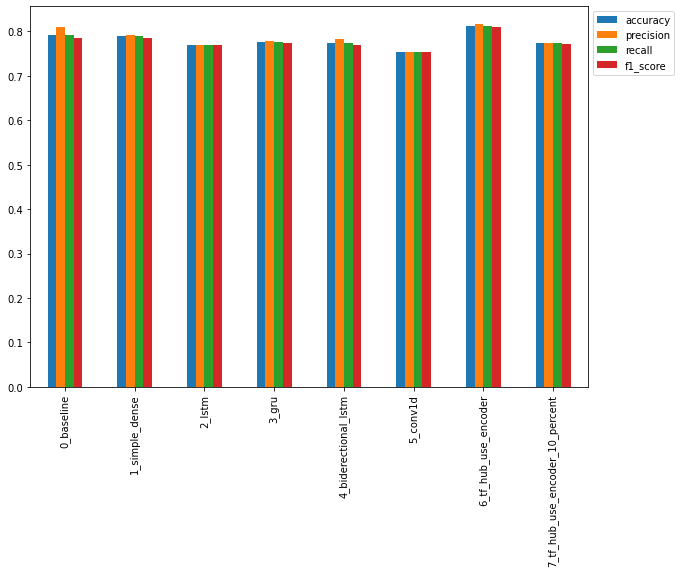

In [170]:
all_model_results.plot(kind = 'bar', figsize = (10,7)).legend(bbox_to_anchor = (1.0,1.0));


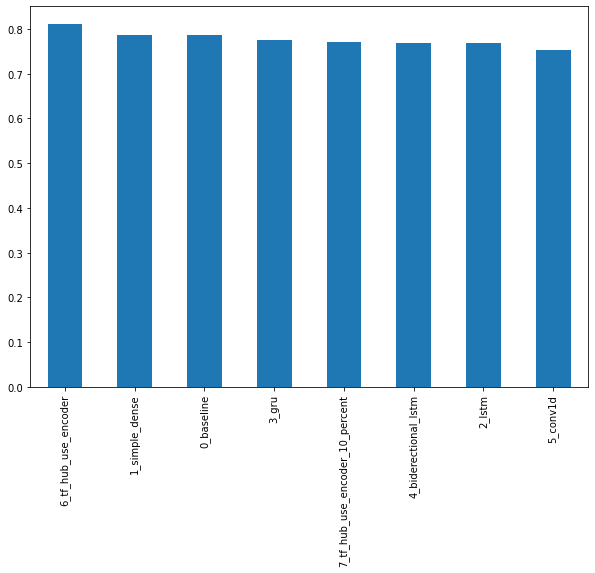

In [173]:
# Sort model results by f1-score
all_model_results.sort_values('f1_score', ascending=False)['f1_score'].plot(kind = 'bar', figsize = (10,7))

Drilling down into a single metric we see our USE TensorFlow Hub models performing  better than all of the other models. Interestingly, the baseline's F1-score isn't too far off the rest of the deeper models.

We can also visualize all of our model's training logs using TensorBoard.dev.

In [175]:
tensorboard_dir

'/content/drive/MyDrive/ZTM_tensorflow_developer/tensorboard'

In [176]:
# View tensorboard logs of transfer learning modelling experiments (should be 4 models)
# Upload TensorBoard dev records
!tensorboard dev upload --logdir /content/drive/MyDrive/ZTM_tensorflow_developer/tensorboard \
  --name "NLP modelling experiments" \
  --description "A series of different NLP modellings experiments with various models" \
  --one_shot # exits the uploader when upload has finished

2021-06-02 11:50:04.740140: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Data for the "text" plugin is now uploaded to TensorBoard.dev! Note that uploaded data is public. If you do not want to upload data for this plugin, use the "--plugins" command line argument.

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/MjBW473uRpe4EqOeAPXMIg/

[2021-06-02T11:50:37] Started scanning logdir.
[2021-06-02T11:52:11] Total uploaded: 1146 scalars, 0 tensors, 39 binary objects (11.7 MB)
[2021-06-02T11:52:11] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/MjBW473uRpe4EqOeAPXMIg/


In [ ]:
# If you need to remove previous experiments, you can do so using the following command
# !tensorboard dev delete --experiment_id EXPERIMENT_ID_TO_DELETE

## Saving and Loading our model

In [177]:
# Save our best model in `hdf5` format(model_6)
# model_6.save("/content/drive/MyDrive/ZTM_tensorflow_developer/saved_models/6_tfhub_use_sentence_encoder.h5")

In [178]:
# # Load model having a custom layer (required for hdf5 format)
# loaded_model_6 = tf.keras.models.load_model("/content/drive/MyDrive/ZTM_tensorflow_developer/saved_models/6_tfhub_use_sentence_encoder.h5",
#                                             custom_objects = {"KerasLayer": hub.KerasLayer})

In [180]:
# model_6_results

{'accuracy': 81.23359580052494,
 'f1_score': 0.8103608606190676,
 'precision': 0.8159313907853404,
 'recall': 0.8123359580052494}

In [183]:
# Check if the loaded model gives the same results
# get_results(y_val,tf.squeeze(tf.round(loaded_model_6.predict(X_val))))

{'accuracy': 81.23359580052494,
 'f1_score': 0.8103608606190676,
 'precision': 0.8159313907853404,
 'recall': 0.8123359580052494}

In [184]:
# loaded_model_6.evaluate(X_val, y_val)

24/24 [==============================] - 1s 12ms/step - loss: 0.4305 - accuracy: 0.8123


[0.4304948151111603, 0.8123359680175781]

In [185]:
# Save our best model in `SavedModel` format(model_6)
# model_6.save("/content/drive/MyDrive/ZTM_tensorflow_developer/saved_models/6_tfhub_use_sentence_encoder_SavedModel")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ZTM_tensorflow_developer/saved_models/6_tfhub_use_sentence_encoder_SavedModel/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/ZTM_tensorflow_developer/saved_models/6_tfhub_use_sentence_encoder_SavedModel/assets


In [186]:
# Load model saved in SavedModel format
# loaded_model_6_savedmodelformat = tf.keras.models.load_model("/content/drive/MyDrive/ZTM_tensorflow_developer/saved_models/6_tfhub_use_sentence_encoder_SavedModel")

In [188]:
# model_6_results

{'accuracy': 81.23359580052494,
 'f1_score': 0.8103608606190676,
 'precision': 0.8159313907853404,
 'recall': 0.8123359580052494}

In [190]:
# Check if the loaded model gives the same results
# get_results(y_val,tf.squeeze(tf.round(loaded_model_6_savedmodelformat.predict(X_val))))

{'accuracy': 81.23359580052494,
 'f1_score': 0.8103608606190676,
 'precision': 0.8159313907853404,
 'recall': 0.8123359580052494}

In [191]:
# loaded_model_6_savedmodelformat.evaluate(X_val, y_val)

24/24 [==============================] - 1s 12ms/step - loss: 0.4305 - accuracy: 0.8123


[0.4304948151111603, 0.8123359680175781]

## Finding the most wrong examples  (Model Driven Data Exploration/ Active learning)

We mentioned before that if many of our modelling experiments are returning similar results, despite using different kinds of models, it's a good idea to return to the data and inspect why this might be.

One of the best ways to inspect your data is to sort your model's predictions and find the samples it got *most* wrong, meaning, what predictions had a high prediction probability but turned out to be wrong.

> Visualize, visualize, visualize.

To make things visual, let's take our best performing model's prediction probabilities and classes along with the validation samples (text and ground truth labels) and combine them in a pandas DataFrame.

* If our best model still isn't perfect, what examples is it getting wrong? 
* Which ones are the *most* wrong?
* Are there some labels which are wrong? E.g. the model gets it right but the ground truth label doesn't reflect this

In [192]:
# download pretrained model from google storage
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip

--2021-06-02 13:55:07--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.153.128, 74.125.128.128, 74.125.143.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.153.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  69.5MB/s    in 13s     

2021-06-02 13:55:20 (70.3 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables

In [193]:
# get previously trained model from google storage
model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(X_val, y_val)

24/24 [==============================] - 1s 13ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723122239112854, 0.8162729740142822]

In [194]:
# make predictions with loaded model
model_6_pretrained_pred_probs = model_6_pretrained.predict(X_val)
model_6_pretrained_pred_labels = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_pred_labels[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [195]:
# Create dataframe with validation sentences, validation labels and best performing model predictions
val_df = pd.DataFrame({"text":X_val,
                       "target": y_val,
                       "pred": model_6_pretrained_pred_labels,
                       "pred_probs": model_6_pretrained_pred_probs})
val_df

Exception: ignored

In [198]:
# Create dataframe with validation sentences, validation labels and best performing model predictions
val_df = pd.DataFrame({"text":X_val,
                       "target": y_val,
                       "pred": model_6_pretrained_pred_labels,
                       "pred_probs": tf.squeeze(model_6_pretrained_pred_probs)})
val_df[:10]

,text,target,pred,pred_probs
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808
5,Investigators rule catastrophic structural fai...,1,1.0,0.709675
6,How the West was burned: Thousands of wildfire...,1,1.0,0.981907
7,Map: Typhoon Soudelor's predicted path as it a...,1,1.0,0.981066
8,Ûª93 blasts accused Yeda Yakub dies in Karach...,1,1.0,0.945744
9,My ears are bleeding https://t.co/k5KnNwugwT,0,0.0,0.085040


In [199]:
# Find the wrong predictions and sort by prediction probabilities 
# [INCORRECT]
most_wrong_preds = val_df[val_df['target']!= val_df['pred']].sort_values('pred_probs', ascending = False).copy()


`NOT CORRECT WAY` BECAUSE PRED_PROBS CLOSER TO 1 MEANS IT IS PREDICTING LABEL ONE WITH VERY HIGH PROBABILITY
WHEREAS PRED_PROBS CLOSER TO 0 MEANS IT'S PREDICTING 0 WITH VERY HIGH PROBABILITY.  
CLOSER TO 0 DOESN'T MEAN THAT IT IS LESS WRONG.  
THAT'S WHY SORTING IN DESCENDING AND GETTING TOP 10 ISN'T CORRECT WAY OF VISUALIZING THE MOST WRONG PREDICTIONS.  
THE `CORRECT WAY` WOULD BE TO TAKE PREDICTIONS THAT ARE VERY CLOSE TO BOTH 1 OR 0 (OPPOSITE TO TRUTH LABEL).  

> EXAMPLE: If a sentence had true label = 1 but it predicts 0 with 0.0001 probability, this is as bad as predicting another label with true label = 0 as 1 with 0.9999 probability.

* `0` = Not a real diaster Tweet
* `1` = Real diaster Tweet

In [201]:
most_wrong_preds[:10] # These are false positives

,text,target,pred,pred_probs
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


* `0` = Not a real diaster Tweet
* `1` = Real diaster Tweet

In [205]:
most_wrong_preds[-10:] # These are False negatives

,text,target,pred,pred_probs
536,@DavidVonderhaar At least you were sincere ??,1,0.0,0.067303
408,@willienelson We need help! Horses will die!Pl...,1,0.0,0.055076
294,Lucas Duda is Ghost Rider. Not the Nic Cage ve...,1,0.0,0.054603
221,going to redo my nails and watch behind the sc...,1,0.0,0.054597
59,You can never escape me. Bullets don't harm me...,1,0.0,0.049637
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043918
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


In [214]:
# Check the false positives(model predicted 1 when should've been 0)
for row in most_wrong_preds[:10].itertuples():
  _,text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred:{pred}, Prob: {pred_prob}")
  print(f"Text: {text}")
  print('\n----------------\n')
  # print(row)

Target: 0, Pred:1.0, Prob: 0.9101957082748413
Text: ? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----------------

Target: 0, Pred:1.0, Prob: 0.8769820928573608
Text: FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----------------

Target: 0, Pred:1.0, Prob: 0.8523001670837402
Text: @noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----------------

Target: 0, Pred:1.0, Prob: 0.8354544639587402
Text: Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----------------

Target: 0, Pred:1.0, Prob: 0.8272132873535156
Text: @AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

----------------

Target: 0, Pred:1.0, Prob: 0.814815878868103
Text: @SonofLiberty357 all illuminated by the

In [216]:
# Check the false negatives(model predicted 0 when should've been 1)
for row in most_wrong_preds[-10:].itertuples():
  _,text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred:{pred}, Prob: {pred_prob}")
  print(f"Text: {text}")
  print('\n----------------\n')
  # print(row)

Target: 1, Pred:0.0, Prob: 0.06730341911315918
Text: @DavidVonderhaar At least you were sincere ??

----------------

Target: 1, Pred:0.0, Prob: 0.05507585406303406
Text: @willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----------------

Target: 1, Pred:0.0, Prob: 0.054603397846221924
Text: Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----------------

Target: 1, Pred:0.0, Prob: 0.05459702014923096
Text: going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----------------

Target: 1, Pred:0.0, Prob: 0.04963722825050354
Text: You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----------------

Target: 1, Pred:0.0, Prob: 0.043918460607528687
Text: @SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off l

## Making predictions on the test dataset

Alright we've seen how our model's perform on the validation set.

But how about the test dataset?

We don't have labels for the test dataset so we're going to have to make some predictions and inspect them for ourselves.

Let's write some code to make predictions on random samples from the test dataset and visualize them.

In [218]:
# Making predictions on the test dataset
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample])) # has to be list
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

Pred: 0, Prob: 0.061796605587005615
Text:
OH MY GOSH IM AT MY AUNTS HOUSE AND THIS POST IT WAS ON HER COUNTER AND I SCREAMED BC I THOUGHT IT SAID CHRIS KELLER http://t.co/DNofWtAkAt

----

Pred: 1, Prob: 0.9599230885505676
Text:
Families to sue over Legionnaires - More than 40 families affected by the fatal outbreak of Legionnaires' disease ... http://t.co/urbl692Syj

----

Pred: 1, Prob: 0.9895308017730713
Text:
Struggling to Return to Life: Makurazaki Typhoon on September 17 1945 killed thousands. http://t.co/fmp0JsH4wX http://t.co/X3TotYZAZe

----

Pred: 0, Prob: 0.28527605533599854
Text:
heart sinking like a sunset?? https://t.co/3cXPRDJFfe

----

Pred: 1, Prob: 0.9162670969963074
Text:
More Natural Disaster Research Urgent http://t.co/5Cm0LfZhxn via #JakartaPost

----

Pred: 0, Prob: 0.37976178526878357
Text:
Good olde fashioned prairie #hailstorm #calgaryweather https://t.co/hI1yOQFlfm

----

Pred: 0, Prob: 0.07969796657562256
Text:
US Navy Sidelines 3 Newest Subs http://t.co/qmA

## Predicting on Tweets from the wild

How about we find some Tweets and use our model to predict whether or not they're about a diaster or not?

To start, let's take one of my own [Tweets on living life like an ensemble model](https://twitter.com/mrdbourke/status/1313649328351662082). 

In [220]:
# Turn Tweet into string
daniels_tweet = "Life like an ensemble: take the best choices from others and make your own"

Now we'll write a small function to take a model and an example sentence and return a prediction.

In [221]:
def predict_on_sentence(model, sentence):
  """
  Uses model to make a prediction on sentence.

  Returns the sentence, the predicted label and the prediction probability.
  """
  pred_prob = model.predict([sentence])
  pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
  print(f"Pred: {pred_label}", "(real disaster)" if pred_label > 0 else "(not real disaster)", f"Prob: {pred_prob[0][0]}")
  print(f"Text:\n{sentence}")

Great! Time to test our model out.

In [222]:
# Make a prediction on Tweet from the wild
predict_on_sentence(model=model_6_pretrained, # use the USE model
                    sentence=daniels_tweet)

Pred: 0.0 (not real disaster) Prob: 0.057196199893951416
Text:
Life like an ensemble: take the best choices from others and make your own


Woohoo! Our model predicted correctly. My Tweet wasn't about a diaster.

How about we find a few Tweets about actual diasters?

Such as the following two Tweets about the 2020 Beirut explosions.

In [223]:
# Source - https://twitter.com/BeirutCityGuide/status/1290696551376007168
beirut_tweet_1 = "Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon"

# Source - https://twitter.com/BeirutCityGuide/status/1290773498743476224
beirut_tweet_2 = "#Beirut declared a “devastated city”, two-week state of emergency officially declared. #Lebanon"

In [225]:
# Predict on diaster Tweet 1
predict_on_sentence(model=model_6_pretrained, 
                    sentence=beirut_tweet_1)

Pred: 1.0 (real disaster) Prob: 0.9691982269287109
Text:
Reports that the smoke in Beirut sky contains nitric acid, which is toxic. Please share and refrain from stepping outside unless urgent. #Lebanon


In [226]:
# Predict on diaster Tweet 2
predict_on_sentence(model=model_6_pretrained, 
                    sentence=beirut_tweet_2)

Pred: 1.0 (real disaster) Prob: 0.9795359373092651
Text:
#Beirut declared a “devastated city”, two-week state of emergency officially declared. #Lebanon


## The speed/score tradeoff

In [233]:
# Function to measure time of prediction
import time
def pred_timer(model,samples):
    """
    Times how long a model takes to make predictions on samples.
    
    Args:
    ----
    model = a trained model
    sample = a list of samples

    Returns:
    ----
    total_time = total elapsed time for model to make predictions on samples
    time_per_pred = time in seconds per single sample
    """
    start_time = time.perf_counter()
    model.predict(samples)
    end_time = time.perf_counter()
    total_time = end_time - start_time
    time_per_pred = total_time/len(samples)
    return total_time, time_per_pred

In [237]:
# Calculate TF Hub Sentence Encoder prediction times
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6_pretrained, X_val)
model_6_total_pred_time, model_6_time_per_pred

(0.31351032300153747, 0.00041143087008075783)

In [238]:
# Calculate Naive Bayes prediction times
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, X_val)
baseline_total_pred_time, baseline_time_per_pred

(0.02320445599980303, 3.0452041994492166e-05)

In [239]:
model_6_pretrained_results = get_results(y_val, model_6_pretrained_pred_labels)
model_6_pretrained_results

{'accuracy': 81.62729658792651,
 'f1_score': 0.8148082644367335,
 'precision': 0.818446310697231,
 'recall': 0.8162729658792651}

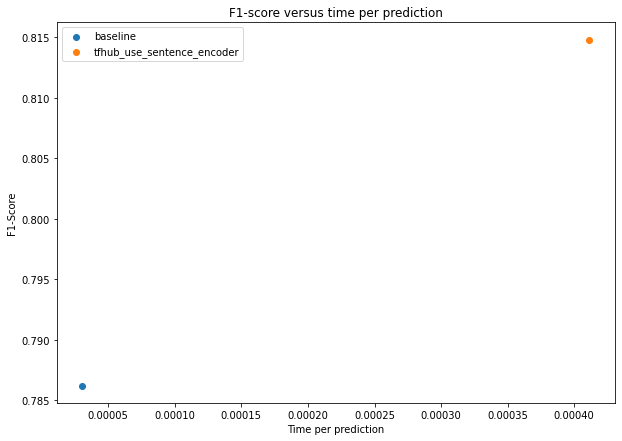

In [241]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
plt.scatter(baseline_time_per_pred,baseline_results['f1_score'], label = 'baseline')
plt.scatter(model_6_time_per_pred, model_6_pretrained_results['f1_score'], label = 'tfhub_use_sentence_encoder')
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");